# -----------Python for Data Analysis and Scientific Computing-Project------------
## -------------------------------------Aslihan Demirkaya-------------------------------------

In this project, I will present the numerical existence and the behavior of kink-antikink solutions of a very well known partial differential equation (PDE), known as $\phi^4$ model.

\begin{equation}\label{PDE}
u_{tt}=u_{xx}-V'(u)
\end{equation}
where $V(u)=\frac{1}{2}(1-u^2)^2$. 

First, I will work on the numerical existence of such solutions. Then, I will give initial speed to kink and antikink waves and observe their collision. The collision will occur in n-bounce windows for various values of the initial speed. I will make simulations for those collisions.
The reason I picked this problem as my project for this class is I have been working on variations of this PDE for years. I have used MATLAB to study such equations. I think it will be a great opportunity for me to study this PDE by using Python.


# Steady State Kinks:

   Steady state solutions are the solutions that do not change in time, in other words, they are independent of time variable. That means if we plug $u(x,t)=\phi(x)$ into $\phi^4$ model, we get 
   
   \begin{equation}
   \phi''-V'(\phi)=\phi''-2\phi^3+2\phi=0.
   \end{equation}

### Solving $\phi''-V'(\phi)=0$ :

This equation is an ordinary differential equation (ODE). Since we are interested in kink solutions, our boundary conditions will be as follows:
\begin{equation}
\phi(-L)=-1,\hspace{1cm} \phi(L)=1
\end{equation}

We will assume that $L$ is large because in the original case the domain is $(-\infty, \infty)$. Since we can't work on an infinite domain, we will take try to work on a large domain, and for that purpose we will take $L=30$. 

In order to solve this boundary value problem (BVP), we need to write $\phi ''$ term as $D2 * \phi$ where $D2$ is the numerical second derivative matrix. We also have to give an initial guess to the ODE solver. 

## Creating Data for Initial Guess 

We are going to try random functions (arrays) as initializers. We know that $\phi=0$, $\phi=\pm 1$ are the fixed solutions. Thus, we will expect to see solutions with the range $[-1,1]$. Below, we will construct 100 numpy arrays with that range. We then write those arrays to the data file: "InitialData.mat".  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import randn as rnd
from scipy import io as sio
import scipy.stats as stats
a=rnd(600,100) # we initialize a matrix with 600 rows, 100 columns. 
for i in np.arange(100):
    lower, upper = -1, 1
    mu, sigma = 0, 1
    X = stats.truncnorm(
        (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma) # we normalize so that it is bounded between -1 and 1.
    a[275:325,i]=X.rvs(50)    
    a[0:275,i]=-1*np.ones(275) #The left tail is -1
    a[325:600,i]=np.ones(275)   #The right tail is 1 
    a[:,i]=np.sort(a[:,i]) # We have to sort to look like a sigmoid function
sio.savemat('/Users/demirkaya/Desktop/DataScience/UC_BerkeleyExtension/PythonDataScience/Project_A_Demirkaya/InitialData.mat',{'a':a})


# Loading Initial Data

We are going to load the data, which is a matrix of 600 rows and 100 columns. 

In [2]:
initializer=sio.loadmat('/Users/demirkaya/Desktop/DataScience/UC_BerkeleyExtension/PythonDataScience/Project_A_Demirkaya/InitialData.mat',struct_as_record=True)
initial_guess_1=initializer['a']
#initial_guess_1[:,i] where i varies from 0 to 99. 


## Using fsolve:

Since our initializers are now ready to solve the equation: $\phi''-V'(\phi)=0$. We use 'fsolve' together with "gradient" function twice to estimate $\phi''$.  

/Users/demirkaya/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


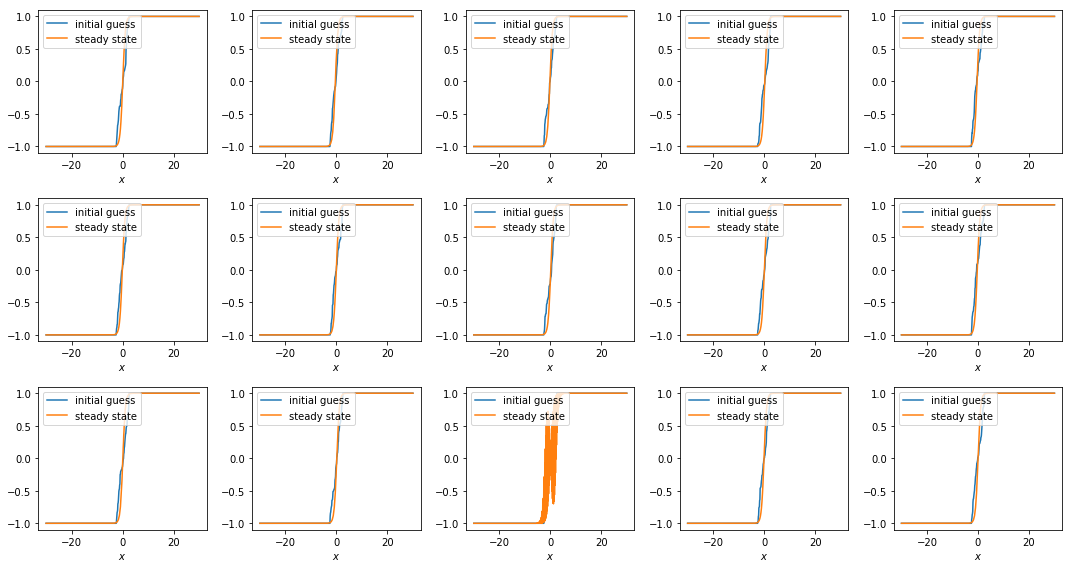

In [3]:
from scipy.optimize import fsolve  
import matplotlib.pyplot as plt
x=np.linspace(-30.0, 30.0, num=600)
def func2(u):
    out = np.gradient(np.gradient(u,x),x)-2*u**3+2*u
    return(out)

fig = plt.figure(figsize=(15,8))
for i in np.arange(15): #we can try all of them, i.e. 99 instead of 25. 
    plt.subplot(3,5,i+1)
    initial_guess=initial_guess_1[:,i]
    steady_state = fsolve(func2,initial_guess)

    plt.plot(x,initial_guess,label='initial guess')
    plt.plot(x,steady_state,label='steady state')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
fig.tight_layout()


Text(0.5,0,'$x$')

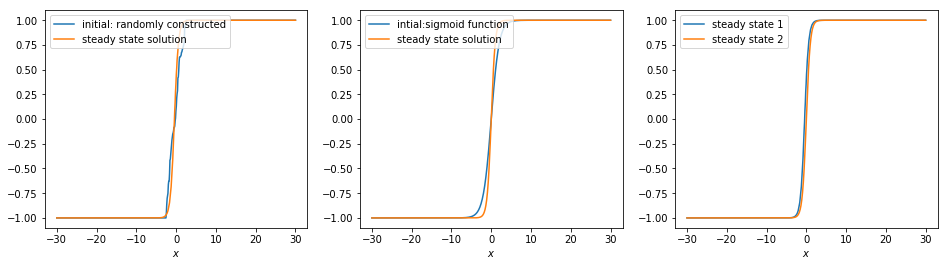

In [4]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
x=np.linspace(-30.0, 30.0, num=600)
def func2(u):
    out = np.gradient(np.gradient(u,x),x)-2*u**3+2*u
    return(out)

initial_guess=initial_guess_1[:,1]  # we can change 1 to other values (0 to 99) if it does not converge.
initial_guess_sigmoid=(2/(1+np.exp(-x)))-1 #this is a good initializer close to what we want to see.
steady_state_1 = fsolve(func2,initial_guess)
steady_state_2 = fsolve(func2,initial_guess_sigmoid)


fig = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(x,initial_guess,label='initial: randomly constructed')
plt.plot(x,steady_state_1,label='steady state solution')
plt.legend(loc='upper left')
plt.xlabel('$x$')

plt.subplot(1,3,2)
plt.plot(x,initial_guess_sigmoid,label='intial:sigmoid function')
plt.plot(x,steady_state_2,label='steady state solution')
plt.legend(loc='upper left')
plt.xlabel('$x$')

plt.subplot(1,3,3) #we want to see if the steadty state solutions differ.
plt.plot(x,steady_state_1,label='steady state 1')
plt.plot(x,steady_state_2,label='steady state 2')
plt.legend(loc='upper left')
plt.xlabel('$x$')


# Moving Kink Solutions

In this section, we will study the moving single kink in the form $u(x,t)=\phi(x-ct)$. We will give speed $c$ to the kink (the steady one we solved above) and observe its behavior. We will study the system below and solve $u(x,t)$.
\begin{equation}
u_{tt}=u_{xx}+2u-2u^3\\
u(x,0)=\phi(x)\\
u_t(x,0)=-c\phi'(x)
\end{equation}

In the below code, we first change the second order ODE into a first order system and then use "odeint" function to solve the system. The output is Uc1, which the first half of which is $u$ and the second half is $u_t$. 

In [5]:
from scipy.integrate import odeint
N=len(x)
c=0.5 #we can change the speed here. We take c=0.5, 0 and c=-0,5. 
def dU_dt(U, t):
    # Here U is a vector such that u=U[0:N] and u_t=U[N:2*N]. 
    return np.append(np.array(U[N:2*N]), np.gradient(np.gradient(U[0:N],x),x)+2*U[0:N]-2*(U[0:N]**3))
U0 = np.append(steady_state_2,-c*np.gradient(steady_state_2,x))
ts = np.linspace(0, 30, 100) #time interval is [0,30] partitioned into 100.
Uc1 = odeint(dU_dt, U0, ts) 
ys = Uc1  

In [6]:
Uc1.shape #the size of the returned solution is (100,1200). 
          #100 corresponds to time variable, 1200 is the sum of the sizes u and u_t

(100, 1200)

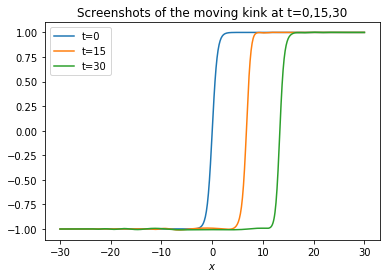

In [7]:
u_soln_0=Uc1[0,:N] #corresponds to u(x,0) when c=0.5
u_soln_50=Uc1[50,:N] # corresponds to u(x,15) when c=0.5
u_soln_99=Uc1[99,:N] # corresponds to u(x,30) when c=0.5

plt.plot(x, u_soln_0, label="t=0") #initial solution
plt.plot(x, u_soln_50,label="t=15")  # solution when time=0
plt.plot(x, u_soln_99, label="t=30") # solution when time=30
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.title('Screenshots of the moving kink at t=0,15,30')
plt.show()

Note that when we take $c=0$, we have the steady state solution so we will not expect the kink to move. However, for positive $c$ values, we will observe that the kink will move to the right and for negative $c$ values, the kink will move to the left. Below we will show simulation of the kink for the cases $c=0.5$, $c=0$ and $c=-0.5$ respectively.

### Saving the Data: $c=-0.5$, $c=0$ and $c=0.5$:
We would like to solve the moving kink solutions for $c=-0.5$, $c=0$ and $c=0.5$. First, we define a function "kinksolve(c)" that solves the differential equation using the function: "odeint" and then we call "kinksolve(c)" for three c values: 0.5, 0 and 0.

In [8]:
def kinksolve(c):
    U0 = np.append(steady_state,-c*np.gradient(steady_state_2,x))
    ts = np.linspace(0, 30, 100) #time interval is [0,30] partitioned into 100.
    Uc1 = odeint(dU_dt, U0, ts) 
    return Uc1

In [9]:
kink = dict()
for c in [0.5, 0, -0.5]:
    print(f"solving for c = {c}")
    kink[c] = kinksolve(c)

solving for c = 0.5
solving for c = 0
solving for c = -0.5


## Animations for $c=-0.5$, $c=0$ and $c=0.5$

In [10]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
N=600
plt.figure(figsize=(2, 2))
fig = plt.gcf()
ax = plt.gca()
# fig, ax = plt.subplots()

ax.set_xlim(( -30, 30))
ax.set_ylim((-1.5, 1.5))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)
def animate1(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = kink[0.5][i,:N] 
    line.set_data(x, y)
    return (line,)
def animate2(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = kink[0][i,:N] 
    line.set_data(x, y)
    return (line,)
def animate3(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = kink[-0.5][i,:N] 
    line.set_data(x, y)
    return (line,)

anim1 = animation.FuncAnimation(fig, animate1, init_func=init, interval=100, blit=True)
h_anim1 = anim1.to_jshtml()
anim2 = animation.FuncAnimation(fig, animate2, init_func=init, interval=100, blit=True)
h_anim2 = anim2.to_jshtml()
anim3 = animation.FuncAnimation(fig, animate3, init_func=init, interval=100, blit=True)
h_anim3 = anim3.to_jshtml()

plt.close()
#HTML(h_anim2)

H_table = """<table>
  <tr>
    <th>{}</th>
    <th>{}</th> 
    <th>{}</th>
  </tr>
  </table>""".format(h_anim1, h_anim2, h_anim3)

HTML(H_table)

# Moving Kink-Antikink Solutions

In this section, we will give the same speed to kink and antikink solutions and send them towards each other. In order to do this, we will first change the single kink into a function form and then shift it 10 units to the left. Here is the PDE problem we will work on:
\begin{equation}
u_{tt}=u_{xx}+2u-2u^3\\
u(x,0)=\phi(x+10)-\phi(x-10)-1\\
u_t(x,0)=-c\phi'(x+10)+c\phi(x-10)
\end{equation}

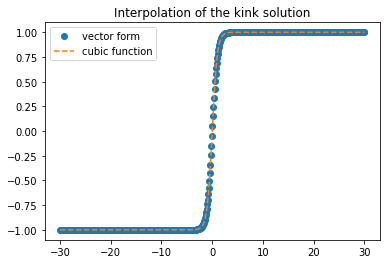

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d 
x=np.linspace(-30.0, 30.0, num=600)
y=steady_state_2
f = interp1d(x, y, kind='cubic') #by interpolating, we change the vector into a function form

xnew = np.linspace(-30, 30, num=600, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '--')
plt.legend(['vector form', 'cubic function'], loc='best')
plt.title('Interpolation of the kink solution')
plt.show()

## Constructing kink-antikink system

Assuming $\phi(x)$ is the kink solution, we define the antikink solution as $-\phi(x)$. If we shift kink solution 10 units to the left, we get $\phi(x+10)$, if we shift antikink 10 units to the right, we get $-\phi(x-10)$. Adding them makes the tails at 0 and 2. Since the fixed solutions of the $\phi^4$ model are -1, 0 and 1, we subtract the sum by 1. That give us: $\phi(x+10)-\phi(x-10)-1$. Below is the code that creates the kink-antikink system.  

In [13]:
x=np.linspace(-20.0, 20.0, num=400)
kink=[]
antikink=[]
for a in x:
    z1=f(a+10)
    kink=np.append(kink,z1)

for a in x:
    z2=-f(a-10)
    antikink=np.append(antikink,z2)

## Plotting kink and antikink and the system
Below is the code that plots the kink: $\phi(x+10)$, antikink: $-\phi(x-10)$ and kink+antikink-1: $\phi(x+10)-\phi(x-10)-1$.

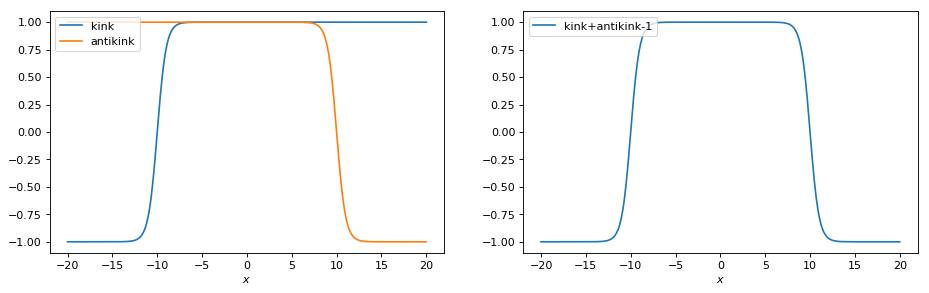

In [14]:
plt.figure(1, figsize=(14, 4), dpi= 80)
plt.subplot(121)
plt.plot(x, kink, label='kink')
plt.plot(x, antikink,label='antikink')
plt.legend(loc='upper left')
plt.xlabel('$x$')

plt.subplot(122)
plt.plot(x, kink+antikink-1, label="kink+antikink-1")
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Next, we give speed to kink and antikink so that they move towards each other. The speed is the same but with the opposite sign so that they will collide. We observe that when $c=0.26$, we get one bounce.  We get two bounces when $c=0.2265$. We get three bounces when $c=0.22245$. We get infinite bounces when $c=0.19$. 

In [15]:
def solve(c):
    U0 = np.append(kink+antikink-1,-c*np.gradient(kink,x)+c*np.gradient(antikink,x))
    ts = np.linspace(0, 200, 400) #time interval is [0,100] partitioned into 100.
    U_kak = odeint(dU_dt, U0, ts) 
    return U_kak    

In [22]:
from scipy.integrate import odeint
N=len(x)
solutions = dict()
for c in [0.29, 0.2265,0.22245,0.19]:
    print(f"solving for c = {c}")
    solutions[c] = solve(c)

solving for c = 0.29
solving for c = 0.2265
solving for c = 0.22245
solving for c = 0.19


## Countermap of the kink-antikink system

In the below code, we present the countermap of the moving kink-antikink system for the c-values mentioned above. We observe n-bounce windows.

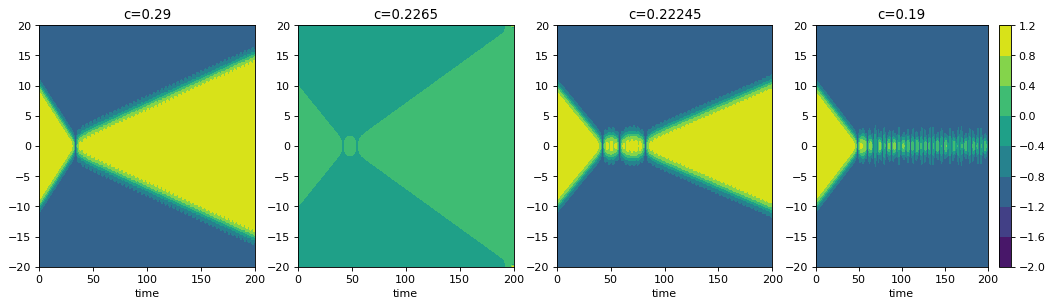

In [23]:
N1=400
x = np.linspace(-20.0, 20.0, num=400)
t = np.linspace(0, 200, 400)
h1=np.zeros([len(t),N1])
h2=np.zeros([len(t),N1])
h3=np.zeros([len(t),N1])
h4=np.zeros([len(t),N1])
for i in range(400):
    h1[i]= solutions[0.29][i,:N1]
    h2[i]= solutions[0.2265][i,:N1]
    h3[i]= solutions[0.22245][i,:N1]
    h4[i]= solutions[0.19][i,:N1]
    
plt.figure(1,figsize=(16, 4), dpi= 80)
plt.subplot(141)
plt.contourf(t,x,h1.T)
plt.xlabel('time')
plt.title('c=0.29')

plt.subplot(142)
plt.contourf(t,x,h2.T)
plt.xlabel('time')
plt.title('c=0.2265')

plt.subplot(143)
plt.contourf(t,x,h3.T)
plt.xlabel('time')
plt.title('c=0.22245')

plt.subplot(144)
plt.contourf(t,x,h4.T)
plt.title('c=0.19')
plt.xlabel('time')
plt.colorbar()
plt.show()


## Animations of the kink-antikink system

In the below code, we animate the moving kink-antikink system for the c-values mentioned above. We observe n-bounce windows.

In [24]:
N=600
fig, ax = plt.subplots()

ax.set_xlim(( -30, 10))
ax.set_ylim((-1.5, 1.5))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)
def animate1(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = solutions[0.29][2*i,:N] # we observe one bounce.
   
    line.set_data(x, y)
    return (line,)

def animate2(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = solutions[0.2265][2*i,:N] # we observe two bounces.
   
    line.set_data(x, y)
    return (line,)

def animate3(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = solutions[0.22245][2*i,:N] # we observe three bounces.
   
    line.set_data(x, y)
    return (line,)

def animate4(i):
    x = np.linspace(-30.0, 30.0, num=600)
    y = solutions[0.19][2*i,:N] # we observe infinite bounces.
   
    line.set_data(x, y)
    return (line,)

anim1 = animation.FuncAnimation(fig, animate1, init_func=init, interval=100, blit=True)
h_anim1 = anim1.to_jshtml()
# HTML(anim1.to_jshtml())

anim2 = animation.FuncAnimation(fig, animate2, init_func=init, interval=100, blit=True)
h_anim2 = anim2.to_jshtml()

anim3 = animation.FuncAnimation(fig, animate3, init_func=init, interval=100, blit=True)
h_anim3 = anim3.to_jshtml()
# HTML(anim1.to_jshtml())

anim4 = animation.FuncAnimation(fig, animate4, init_func=init, interval=100, blit=True)
h_anim4 = anim4.to_jshtml()

plt.close()
#HTML(h_anim2)

H_table = """<table>
  <tr>
    <th>{}</th>
    <th>{}</th> 
  </tr>
  <tr>
    <td>{}</td>
    <td>{}</td> 
  </tr>
</table>""".format(h_anim1, h_anim2, h_anim3, h_anim4)

HTML(H_table)